1.	Your Friend has developed the Product and he wants to establish the product startup and he is searching for a perfect location where getting the investment has a high chance. But due to its financial restriction, he can choose only between three locations -  Bangalore, Mumbai, and NCR. As a friend, you want to help your friend deciding the location. NCR include Gurgaon, Noida and New Delhi. Find the location where the most number of funding is done. That means, find the location where startups has received funding maximum number of times. Plot the bar graph between location and number of funding. Take city name "Delhi" as "New Delhi". Check the case-sensitiveness of cities also. That means, at some place instead of "Bangalore", "bangalore" is given. Take city name as "Bangalore". For few startups multiple locations are given, one Indian and one Foreign. Consider the startup if any one of the city lies in given locations.

NCR


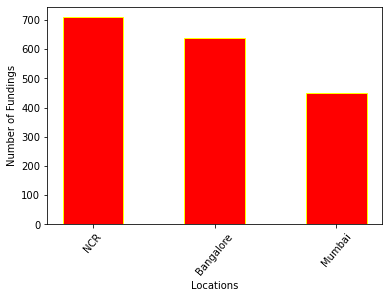

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
f_startup = pd.read_csv("startup_funding.csv", encoding='utf8')
#reading data from startup_funding.csv file

df = f_startup.copy() 
#creating a copy of f_startup dataframe so that we can work on the dataset

df.dropna(subset = ["CityLocation"],inplace = True) 
#removing row's having NAN in city location column

df["CityLocation"].replace("bangalore","Bangalore",inplace = True)
#solving the lower uppercase problems by replacing words

df["CityLocation"].replace("Delhi","New Delhi",inplace = True)

d1 = {}  
#creating the dictionary to maintain the number of fundings in the provided locations

for i in df["CityLocation"]: 
    #using if else .... and traversing through all the locations and maintaining the number of times the provided locations fetched
    
    if "Bangalore" in i:
        d1["Bangalore"] = d1.get("Bangalore",0) + 1  
    elif "Mumbai" in i:
        d1["Mumbai"] = d1.get("Mumbai",0) + 1
    elif "New Delhi" in i:
        d1["New Delhi"] = d1.get("New Delhi",0) + 1
    elif "Noida" in i:
        d1["Noida"] = d1.get("Noida",0) + 1
    elif "Gurgaon" in i:
        d1["Gurgaon"] = d1.get("Gurgaon",0) + 1
        
d1['NCR']=d1['New Delhi']+d1['Gurgaon']+d1['Noida'] # combining the counts for New Delhi,Gurgaon and Noida in NCR
del d1['New Delhi'] # deleting these counts now as they are already counted in NCR
del d1['Gurgaon']
del d1['Noida']
        
        
cities = sorted(d1, key=d1.get , reverse=True)  
#sorting the keys in reverse order(descending to ascending) according to the valuesas we need the max value

fundings = []  

for i in cities: 
    #traversing through the cities and creating a new list of values 
    fundings.append(d1[i])
    
print(cities[0])
#printing the location having most number of fundings since in decending order the 1st one will be the answer at index[0]

plt.bar(cities,fundings,width = 0.5,color = "red" , edgecolor = "yellow") 
#ploting the bar graph....cities vs no of fundings..
plt.xlabel("Locations") 
#labeling x-axis
plt.ylabel("Number of Fundings")
#labeling y_axis
plt.xticks(rotation = 50)
#rotating names in x-axis so that we can see the labels properly
plt.show()

2.	Even after trying for so many times, your friend’s startup could not find the investment. So you decided to take this matter in your hand and try to find the list of investors who probably can invest in your friend’s startup. Your list will increase the chance of your friend startup getting some initial investment by contacting these investors. Find the top 5 investors who have invested maximum number of times (consider repeat investments in one company also). In a startup, multiple investors might have invested. So consider each investor for that startup. Ignore undisclosed investors.



In [2]:
import pandas as pd
import matplotlib.pyplot as plt
f_startup = pd.read_csv("startup_funding.csv", encoding='utf8')
#reading data from startup_funding.csv file

df = f_startup.copy() 
#creating a copy of f_startup dataframe so that we can work on the dataset

df.dropna(subset = ["InvestorsName"],inplace = True)  
#removing row's having NAN in Investors name column

dict_to_find_no_of_investor = {}  
for i in df["InvestorsName"].values:  
    #traversing through the investor names.......to see the number of times the names appeared
    
    if "," in i: 
        #if it contains multiple names ...........then spliting it ..and traversing through each names separately
        for j in i.strip().split(','):
            dict_to_find_no_of_investor[j.strip()] = dict_to_find_no_of_investor.get(j.strip(),0) + 1
    else:
        dict_to_find_no_of_investor[i.strip()] = dict_to_find_no_of_investor.get(i.strip(),0) + 1
        
list=[(frequency,name) for name,frequency in dict_to_find_no_of_investor.items()]
reversed_list=sorted(list,reverse=True)[:5]
for frequency,name in reversed_list:
    print(name,frequency)
    


Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40


3.	After re-analysing the dataset you found out that some investors have invested in the same startup at different number of funding rounds. So before finalising the previous list, you want to improvise it by finding the top 5 investors who have invested in different number of startups. This list will be more helpful than your previous list in finding the investment for your friend startup. Find the top 5 investors who have invested maximum number of times in different companies. That means, if one investor has invested multiple times in one startup, count one for that company. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
f_startup = pd.read_csv("startup_funding.csv", encoding='utf8')
#reading data from startup_funding.csv file

df = f_startup.copy() 
#creating a copy of f_startup dataframe so that we can work on the dataset

df.dropna(subset = ["StartupName","InvestorsName"],inplace = True)  
#removing row's having nan's in Investors name and startupnames columns

df["StartupName"].replace("Flipkart.com","Flipkart",inplace = True)  
#replacing the wrong word with the correct word & spelling

df["StartupName"].replace("Ola Cabs","Ola",inplace = True)
df["StartupName"].replace("Olacabs","Ola",inplace = True)
df["StartupName"].replace("Oyorooms","Oyo",inplace = True)
df["StartupName"].replace("OyoRooms","Oyo",inplace = True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace = True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace = True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace = True)

#created a dictionary for investor names 
# then maintained a set i.e key having investor's name and having a value set of names of stratup in which they did invest
#set is taken as a value to avoid count of multiple investment in a single startup by an investor
d = {}

#in the set there are startup names in which investor's had invested
#in case there are multiple investors for a single startup 
#used split function to split that
#and traversed through each name separately

for i in df.index:
    e = df["InvestorsName"][i].strip()
    if "," in e:
        for j in e.strip().split(','):
            if j.strip() in d:
                d[j.strip()].add(df["StartupName"][i].strip())
            else:
                s = set()
                d[j.strip()] = s
                d[j.strip()].add(df["StartupName"][i].strip())
    else:
        a = e.strip()
        if a in d: 
            d[a].add(df["StartupName"][i].strip())
        else:
            s = set()
            d[a] = s
            d[a].add(df["StartupName"][i].strip())
            
d1 = {}  
#created a dictionary where key is investor's name and value is count of startup's in which they had invested
for i in d:
    if i == "":
        continue
    d1[i] = len(d[i])
    
    
list=[(frequency,name) for name,frequency in d1.items()]
reversed_list=sorted(list,reverse=True)[:5]
for frequency,name in reversed_list:
    print(name,frequency)
    
    


Sequoia Capital 48
Accel Partners 47
Kalaari Capital 41
Indian Angel Network 40
Blume Ventures 36


4.	Even after putting so much effort in finding the probable investors, it didn't turn out to be helpful for your friend. So you went to your investor friend to understand the situation better and your investor friend explained to you about the different Investment Types and their features. This new information will be helpful in finding the right investor. Since your friend startup is at an early stage startup, the best-suited investment type would be - Seed Funding and Crowdfunding. Find the top 5 investors who have invested in a different number of startups and their investment type is Crowdfunding or Seed Funding. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column. There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.



In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
f_startup = pd.read_csv("startup_funding.csv", encoding='utf8')
#reading data from startup_funding.csv file

df = f_startup.copy() 
#creating a copy of f_startup dataframe so that we can work on the dataset

df.dropna(subset = ["InvestorsName"],inplace = True)
#removing row's having nan's in Investors name column..

df["InvestorsName"].replace("Undisclosed Investors","",inplace = True)
#replacing the undisclosed investors name by null values ..

df["InvestorsName"].replace("Undisclosed investors","",inplace = True)
df = df[(df["InvestmentType"] == "Seed Funding") | (df["InvestmentType"] == "Crowd Funding")] 
#keeping only those rows having investment type seed funding and crowd funding..



d = {}  #creating a dictionary to maintain the number of times the investors name appeared 

for i in df["InvestorsName"].values:  #traversing through the investor names to see the number of times the names appeared
    
    if "," in i:  #if it contains multiple names then we split it and traverse through each names separately
        for j in i.strip().split(','):
            d[j.strip()] = d.get(j.strip(),0) + 1
    else:
        d[i.strip()] = d.get(i.strip(),0) + 1
        
del d[""]
#deleting the NULL key from dictionary

    
    
list=[(frequency,name) for name,frequency in d.items()]
reversed_list=sorted(list,reverse=True)[:5]
for frequency,name in reversed_list:
    print(name,frequency)
    

Indian Angel Network 33
Rajan Anandan 25
LetsVenture 16
Anupam Mittal 16
Kunal Shah 14


5.	Due to your immense help, your friend startup successfully got seed funding and it is on the operational mode. Now your friend wants to expand his startup and he is looking for new investors for his startup. Now you again come as a saviour to help your friend and want to create a list of probable new new investors. Before moving forward you remember your investor friend advice that finding the investors by analysing the investment type. Since your friend startup is not in early phase it is in growth stage so the best-suited investment type is Private Equity. Find the top 5 investors who have invested in a different number of startups and their investment type is Private Equity. Correct spelling of investment types are - "Private Equity", "Seed Funding", "Debt Funding", and "Crowd Funding". Keep an eye for any spelling mistake. You can find this by printing unique values from this column.There are many errors in startup names. Ignore correcting all, just handle the important ones - Ola, Flipkart, Oyo and Paytm.

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
f_startup = pd.read_csv("startup_funding.csv", encoding='utf8')
#reading data from startup_funding.csv file

df = f_startup.copy() 
#creating a copy of f_startup dataframe so that we can work on the dataset

df.dropna(subset = ["InvestorsName"],inplace = True) 
#removing row's having NAN in Investors name column..


df["InvestorsName"].replace("Undisclosed Investors","",inplace = True)
#replacing the undisclosed investors name by null values ..

df["InvestorsName"].replace("Undisclosed investors","",inplace = True)

df = df[(df["InvestmentType"] == "Private Equity")]
#keeping only those rows having investment type private equity..

d = {}  #creating a dictionary to maintain the number of times the investors name appeared...


for i in df["InvestorsName"].values: 
    #traversing through the investor names..to see the number of times the names appeared..
    if "," in i: 
        #if it contains multiple names ..then spliting it ..and traversing through each names separately..
        for j in i.strip().split(','):
            d[j.strip()] = d.get(j.strip(),0) + 1
    else:
        d[i.strip()] = d.get(i.strip(),0) + 1
        
del d[""]
#deleting the NULL key from dictionary

list=[(frequency,name) for name,frequency in dict_to_find_no_of_investor.items()]
reversed_list=sorted(list,reverse=True)[:5]
for frequency,name in reversed_list:
    print(name,frequency)
    

Sequoia Capital 64
Accel Partners 53
Kalaari Capital 44
SAIF Partners 41
Indian Angel Network 40
